In [1]:
import pandas as pd

In [2]:
A = 1,000 # 튜플로 인식
B = 2,000
A + B

(1, 0, 2, 0)

In [3]:
A = (1,000)
B = (2,000)
A + B

(1, 0, 2, 0)

In [4]:
A = "1,000"
B = "2,000"
A + B

'1,0002,000'

In [5]:
ser = pd.Series(["1,000", "2,000", "5,000"])
ser

0    1,000
1    2,000
2    5,000
dtype: object

### Q1. 쉼표를 제거하고 정수로 변경하고 원소를 모두 더하시오.
※ ser 객체를 대상으로 문제를 풀이하시오.  
※ .str 엑세서의 .replace() 메서드를 사용하시오.  
※ .astype("int") 를 사용하시오.   

In [6]:
ser.str.replace(pat = ",", repl = "")

0    1000
1    2000
2    5000
dtype: object

In [8]:
ser = ser.str.replace(pat = ",", repl = "")
ser

0    1000
1    2000
2    5000
dtype: object

In [9]:
ser.astype("int")

0    1000
1    2000
2    5000
dtype: int32

In [10]:
ser.sum()

'100020005000'

In [ ]:
ser

In [ ]:
ser = ser.astype("int")
ser

In [15]:
# sum(ser)
ser.sum()

8000

In [17]:
df_london = pd.read_csv("london_energy.csv")

In [18]:
ser_id = df_london["LCLid"].unique()

* 상대경로: 저기 저 앞에 역 8번 출구
* 절대경로: 서울특별시 강남구 강남역 8번 출구

In [19]:
print("london/london_LCLid_" + ser_id[0] + ".csv")
print("london/london_LCLid_" + ser_id[1] + ".csv")

london/london_LCLid_MAC000002.csv
london/london_LCLid_MAC000003.csv


In [20]:
for n_id in ser_id[:10]:
    df_ld_sub = df_london.loc[df_london["LCLid"] == n_id, ]
    df_ld_sub.to_csv("london/london_LCLid_" + n_id + ".csv", index = False)

In [21]:
import os
os.listdir(path = "london")

['london_LCLid_MAC000002.csv',
 'london_LCLid_MAC000003.csv',
 'london_LCLid_MAC000004.csv',
 'london_LCLid_MAC000005.csv',
 'london_LCLid_MAC000006.csv',
 'london_LCLid_MAC000007.csv',
 'london_LCLid_MAC000008.csv',
 'london_LCLid_MAC000009.csv',
 'london_LCLid_MAC000010.csv',
 'london_LCLid_MAC000011.csv']

In [22]:
df_test = pd.read_csv("london/london_LCLid_MAC000002.csv")
df_test.head(2)

LCLid        Date     KWH
0  MAC000002  2012-10-12   7.098
1  MAC000002  2012-10-13  11.087

In [23]:
len(df_test)

505

# 파일 합치기!!!

### Q1. london 폴더에 있는 파일 목록을 불러와서 ls_file 객체에 저장하고 해당 객체의 원소 개수를 출력하시오.

In [25]:
ls_file = os.listdir(path = "london")

In [27]:
len(ls_file)

10

### Q2. 반복문을 사용하여 ls_file 객체의 원소를 하나씩 출력하는 코드를 작성하시오.

In [29]:
for n_file in ls_file:
    print(n_file)

london_LCLid_MAC000002.csv
london_LCLid_MAC000003.csv
london_LCLid_MAC000004.csv
london_LCLid_MAC000005.csv
london_LCLid_MAC000006.csv
london_LCLid_MAC000007.csv
london_LCLid_MAC000008.csv
london_LCLid_MAC000009.csv
london_LCLid_MAC000010.csv
london_LCLid_MAC000011.csv


### Q3. 반복문을 사용하여 ls_file 객체의 원소를 하나씩 출력하는데 출력되는 원소 앞에 "london/" 이라는 텍스트를 이어붙인 결과를 출력하시오.

In [30]:
for n_file in ls_file:
    print("london/" + n_file)

london/london_LCLid_MAC000002.csv
london/london_LCLid_MAC000003.csv
london/london_LCLid_MAC000004.csv
london/london_LCLid_MAC000005.csv
london/london_LCLid_MAC000006.csv
london/london_LCLid_MAC000007.csv
london/london_LCLid_MAC000008.csv
london/london_LCLid_MAC000009.csv
london/london_LCLid_MAC000010.csv
london/london_LCLid_MAC000011.csv


In [31]:
df = pd.DataFrame()
for n_file in ls_file:
    print("london/" + n_file)
    df_sub = pd.read_csv("london/" + n_file)
    df = pd.concat([df, df_sub])

london/london_LCLid_MAC000002.csv
london/london_LCLid_MAC000003.csv
london/london_LCLid_MAC000004.csv
london/london_LCLid_MAC000005.csv
london/london_LCLid_MAC000006.csv
london/london_LCLid_MAC000007.csv
london/london_LCLid_MAC000008.csv
london/london_LCLid_MAC000009.csv
london/london_LCLid_MAC000010.csv
london/london_LCLid_MAC000011.csv


In [32]:
df_list = pd.read_csv("join_list.csv", encoding = "CP949")
df_room = pd.read_csv("join_room.csv", encoding = "CP949")
df_list.head(2)

team    No member
0  TWICE  1287     미나
1  TWICE  1788     나연

In [33]:
df_room.head(2)

floor  room name
0      3  3G-A   미나
1      3  3G-B   나연

In [36]:
df_list.join(df_room, how = "inner")

team    No member  floor  room name
0  TWICE  1287     미나      3  3G-A   미나
1  TWICE  1788     나연      3  3G-B   나연
2  TWICE  1408     다현      3  3G-C   다현
3  TWICE  1881     정연      4  4G-A   정연
4  TWICE  1937     지효      4  4G-B   지효
5  TWICE  1045     채연      4  4G-C   채연
6  TWICE  1525     모모      5  5G-A   모모
7  TWICE  1887     쯔위      5  5G-B   쯔위
8  TWICE  1547     사나      5  5G-C   사나

In [62]:
df_room2 = df_room.sample(n = len(df_room), random_state = 123)
df_room2 = df_room2.reset_index(drop = True)
# df_room2

In [63]:
df_list.join(df_room2, how = "inner")

team    No member  floor  room name
0  TWICE  1287     미나      5  5G-B   쯔위
1  TWICE  1788     나연      3  3G-A   미나
2  TWICE  1408     다현      4  4G-C   채연
3  TWICE  1881     정연      5  5G-A   모모
4  TWICE  1937     지효      4  4G-A   정연
5  TWICE  1045     채연      3  3G-B   나연
6  TWICE  1525     모모      5  5G-C   사나
7  TWICE  1887     쯔위      4  4G-B   지효
8  TWICE  1547     사나      3  3G-C   다현

In [64]:
df_list.merge(df_room2, left_on = "member", right_on = "name",
              how = "inner")

team    No member  floor  room name
0  TWICE  1287     미나      3  3G-A   미나
1  TWICE  1788     나연      3  3G-B   나연
2  TWICE  1408     다현      3  3G-C   다현
3  TWICE  1881     정연      4  4G-A   정연
4  TWICE  1937     지효      4  4G-B   지효
5  TWICE  1045     채연      4  4G-C   채연
6  TWICE  1525     모모      5  5G-A   모모
7  TWICE  1887     쯔위      5  5G-B   쯔위
8  TWICE  1547     사나      5  5G-C   사나

In [65]:
elec = pd.read_csv("elec_load.csv")
elec.head(2)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2008      1    1  39638  37682  35801  34154  33068  32529  31982  ...   
1  2008      1    2  37425  35239  33568  32171  31616  31725  32575  ...   

   X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
0  28147  28313  28683  30921  32879  33038  34031  34684  37444  38160  
1  38213  38132  38399  39796  40810  39980  40084  39630  42008  42150  

[2 rows x 27 columns]

In [67]:
elec.loc[:2, "X7HR":"X15HR"]

In [68]:
elec.iloc[0, ]
elec.iloc[0, ].reset_index()

index      0
0    YEAR   2008
1   MONTH      1
2     DAY      1
3    X1HR  39638
4    X2HR  37682
5    X3HR  35801
6    X4HR  34154
7    X5HR  33068
8    X6HR  32529
9    X7HR  31982
10   X8HR  30961
11   X9HR  28323
12  X10HR  27869
13  X11HR  28172
14  X12HR  28501
15  X13HR  28202
16  X14HR  28227
17  X15HR  28147
18  X16HR  28313
19  X17HR  28683
20  X18HR  30921
21  X19HR  32879
22  X20HR  33038
23  X21HR  34031
24  X22HR  34684
25  X23HR  37444
26  X24HR  38160

In [72]:
elec_melt = elec.melt(id_vars = ["YEAR", "MONTH", "DAY"])
elec_melt = elec_melt.sort_values(["YEAR", "MONTH", "DAY", "variable"])
elec_melt.head(2)

YEAR  MONTH  DAY variable  value
31914  2008      1    1    X10HR  27869
35460  2008      1    1    X11HR  28172

### Q1. 2010년도 부터 2012년도까지의 데이터를 추출하여 elec_y3 객체에 저장하시오.
※ elec_melt 객체를 사용하여 문제를 풀이하시오.

In [73]:
elec_y3 = elec_melt.loc[(elec_melt["YEAR"] >= 2010) & (elec_melt["YEAR"] <= 2012),  ]
elec_y3["YEAR"].unique()

array([2010, 2011, 2012], dtype=int64)

In [ ]:
cond_1 = elec_melt["YEAR"] == 2010
cond_2 = elec_melt["YEAR"] == 2011
cond_3 = elec_melt["YEAR"] == 2012
elec_y3 = elec_melt.loc[cond_1 | cond_2 | cond_3,  ]
elec_y3["YEAR"].unique()

In [74]:
elec_y3 = elec_melt.loc[elec_melt["YEAR"].isin([2010, 2011, 2012]),  ]
elec_y3["YEAR"].unique()

array([2010, 2011, 2012], dtype=int64)

### Q2. elec_y3 객체의 마지막 두 개 변수명을 각각 HOUR와 LOAD로 변경하시오.
※ 변수명은 전부 영문 대문자를 사용하시오.

In [75]:
elec_y3.head(2)

YEAR  MONTH  DAY variable  value
32645  2010      1    1    X10HR  32998
36191  2010      1    1    X11HR  33514

In [76]:
elec_y3 = elec_y3.rename(columns = {"variable": "HOUR", "value": "LOAD"})
elec_y3.head(2)

YEAR  MONTH  DAY   HOUR   LOAD
32645  2010      1    1  X10HR  32998
36191  2010      1    1  X11HR  33514

### Q3. HOUR 변수의 X와 HR를 제거하시오.
※ .str 엑세서의 .replace() 메서드를 사용하시오.

In [77]:
# elec_y3["HOUR"] = elec_y3["HOUR"] "!?!?!?!?"
elec_y3["HOUR"] = elec_y3["HOUR"].str.replace(pat = "X", repl = "")
elec_y3.head(2)

YEAR  MONTH  DAY  HOUR   LOAD
32645  2010      1    1  10HR  32998
36191  2010      1    1  11HR  33514

In [ ]:
elec_y3["HOUR"] = elec_y3["HOUR"].str.replace(pat = "X", repl = "")
elec_y3["HOUR"] = elec_y3["HOUR"].str.replace(pat = "HR", repl = "")

In [79]:
# X 또는 HR을 제거
elec_y3["HOUR"] = elec_y3["HOUR"].str.replace(pat = "X|HR", repl = "", regex = True)
# 숫자를 제외한 나머지를 제거
elec_y3["HOUR"] = elec_y3["HOUR"].str.replace(pat = "[^0-9]", repl = "", regex = True)
# regex -> regular expression(정규표현식)
# regex = True --> 정규표현식을 사용하겠다!!!

### Q4. HOUR 변수의 데이터 타입을 확인하고 이를 정수(int)로 변경한 후 다시 HOUR 변수의 데이터 타입을 확인하시오.

In [80]:
elec_y3["HOUR"].dtype

dtype('O')

In [81]:
elec_y3["HOUR"] = elec_y3["HOUR"].astype("int")
elec_y3["HOUR"].dtype

dtype('int32')

In [82]:
elec_y3.head(2)

YEAR  MONTH  DAY  HOUR   LOAD
32645  2010      1    1    10  32998
36191  2010      1    1    11  33514

In [88]:
elec_y3_pivot = elec_y3.pivot(index = ["YEAR", "MONTH", "DAY"],
                              columns = ["HOUR"],
                              values = ["LOAD"])
elec_y3_pivot = elec_y3_pivot.reset_index()
elec_y3_pivot.head(2)

In [87]:
elec.loc[(elec["YEAR"] == 2010) & (elec["MONTH"] == 1) & (elec["DAY"] == 1), ]

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
731  2010      1    1  44836  43190  41568  40160  38968  38410  37867  ...   

     X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
731  33441  33464  34282  36356  38361  39052  39473  39886  43840  44410  

[1 rows x 27 columns]

200


'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
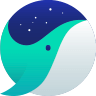
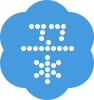

In [90]:
import requests
URL = "https://www.naver.com"
res = requests.get(URL)
print(res.status_code)
res.text

In [91]:
from bs4 import BeautifulSoup as bs
text = "<html><div>bs4!!</div></html>"
text_bs = bs(text, "html.parser")
text_bs.text

'bs4!!'

In [92]:
text_bs

<html><div>bs4!!</div></html>

In [94]:
df_code = pd.read_csv("법정동코드 전체자료.txt", encoding = "CP949")
df_code.head(2)

법정동코드\t법정동명\t폐지여부
0      1100000000\t서울특별시\t존재
1  1111000000\t서울특별시 종로구\t존재

In [95]:
df_code.iloc[:, 0].str.split("\t", expand = True)

0                     1   2
0      1100000000                 서울특별시  존재
1      1111000000             서울특별시 종로구  존재
2      1111010100         서울특별시 종로구 청운동  존재
3      1111010200         서울특별시 종로구 신교동  존재
4      1111010300         서울특별시 종로구 궁정동  존재
...           ...                   ...  ..
46323  5013032022  제주특별자치도 서귀포시 표선면 하천리  존재
46324  5013032023  제주특별자치도 서귀포시 표선면 성읍리  존재
46325  5013032024  제주특별자치도 서귀포시 표선면 가시리  존재
46326  5013032025  제주특별자치도 서귀포시 표선면 세화리  존재
46327  5013032026  제주특별자치도 서귀포시 표선면 토산리  존재

[46328 rows x 3 columns]

In [96]:
df_code = pd.read_csv("법정동코드 전체자료.txt", encoding = "CP949",
                      sep = "\t")
df_code.head(2)

법정동코드       법정동명 폐지여부
0  1100000000      서울특별시   존재
1  1111000000  서울특별시 종로구   존재

### Q1. df_code 객체의 폐지여부 변수의 고유한 원소를 확인하시오.

In [97]:
df_code["폐지여부"].unique()

array(['존재', '폐지'], dtype=object)

### Q2. df_code 객체의 폐지여부 변수에서 "존재" 원소의 비율을 확인하시오.
※ 결과는 반올림하여 소수점 셋째 자리까지 표기하시오.

In [99]:
df_code["폐지여부"].value_counts(normalize = True).round(3)

폐지    0.556
존재    0.444
Name: 폐지여부, dtype: float64

In [101]:
round(len(df_code.loc[df_code["폐지여부"] == "존재", ]) / len(df_code), 3)

0.444

In [105]:
round((df_code["폐지여부"] == "존재").sum() / len(df_code), 3)

0.444

### Q3. df_code 객체의 폐지여부 변수를 참고하여 "존재" 원소만 있는 행을 추출하여 df_code2 객체에 저장하시오.

In [106]:
df_code2 = df_code.loc[df_code["폐지여부"] == "존재", ]

In [109]:
df_code2.tail(2)

법정동코드                  법정동명 폐지여부
46326  5013032025  제주특별자치도 서귀포시 표선면 세화리   존재
46327  5013032026  제주특별자치도 서귀포시 표선면 토산리   존재

### Q4. df_code2 객체의 폐지여부 변수를 제거하시오.

In [ ]:
df_code2 = df_code2.drop("폐지여부", axis = 1) # 특정 변수 제거
df_code2 = df_code2.iloc[:, :-1] # 마지막 변수 제거
df_code2 = df_code2.iloc[:, :2] # 첫 번째 두 번째 변수 선택
df_code2 = df_code2.iloc[:, [0, 1]] # 첫 번째 두 번째 변수 선택
df_code2 = df_code2.lloc[:, ["법정동코드", "법정동명"]]
df_code2 = df_code2[["법정동코드", "법정동명"]]

### Q5. df_code2 객체의 법정동명 변수에 "서울특별시" 가 포함된 행은 몇 개가 있는지 확인하시오.
※ .str 엑세서의 .contains() 메서드를 사용하시오.

In [112]:
# df_code2["법정동명"].str.contains(pat = "서울특별시")
df_code2["법정동명"].str.contains(pat = "서울특별시").sum()

493

In [113]:
# 서울특별시가 있는 행을 필터링 한다면???
df_code3 = df_code2.loc[df_code2["법정동명"].str.contains(pat = "서울특별시"), ]
df_code3.tail(3)

법정동코드           법정동명 폐지여부
1109  1174010800  서울특별시 강동구 성내동   존재
1110  1174010900  서울특별시 강동구 천호동   존재
1111  1174011000  서울특별시 강동구 강일동   존재

In [115]:
df_code.head()

법정동코드           법정동명 폐지여부
0  1100000000          서울특별시   존재
1  1111000000      서울특별시 종로구   존재
2  1111010100  서울특별시 종로구 청운동   존재
3  1111010200  서울특별시 종로구 신교동   존재
4  1111010300  서울특별시 종로구 궁정동   존재

In [118]:
df_code2.loc[df_code2["법정동코드"].astype("str").str.contains(pat = "0{8}$"), ]

법정동코드     법정동명 폐지여부
0      1100000000    서울특별시   존재
2615   2600000000    부산광역시   존재
2926   2700000000    대구광역시   존재
3294   2800000000    인천광역시   존재
3638   2900000000    광주광역시   존재
3884   3000000000    대전광역시   존재
4068   3100000000    울산광역시   존재
4470   4100000000      경기도   존재
11007  4200000000      강원도   존재
13853  4300000000     충청북도   존재
17000  4400000000     충청남도   존재
22267  4500000000     전라북도   존재
25617  4600000000     전라남도   존재
30438  4700000000     경상북도   존재
39662  4800000000     경상남도   존재
46112  5000000000  제주특별자치도   존재

In [120]:
import requests
URL = "https://nip.kdca.go.kr/irgd/cov19stats.do?list=all"
res = requests.get(URL)
res.status_code

200

In [122]:
res.text

In [124]:
res.text.split("\n")

In [125]:
from bs4 import BeautifulSoup as bs
text_bs = bs(res.text, "html.parser")

In [127]:
text_bs

In [128]:
text_bs.select("tpcd")

[<tpcd>당일실적(A)</tpcd>,
 <tpcd>전일누적(B)</tpcd>,
 <tpcd>전체건수(C): (A)+(B)</tpcd>,
 <tpcd>60세이상 접종률</tpcd>]

In [132]:
value_tpcd = text_bs.select("tpcd")
value_1 = text_bs.select("firstcnt")
value_2 = text_bs.select("secondcnt")
value_3 = text_bs.select("thirdcnt")
value_4 = text_bs.select("fourcnt")

In [139]:
value_tpcd[0].text

'당일실적(A)'

### Q1. value_tpcd 객체에서 텍스트를 뽑아 value_tpcd_text 객체에 저장하시오.
* value_tpcd_text 객체는 리스트 객체이다.
* 반복문 또는 리스트 컴프리헨션을 사용하시오.

In [140]:
value_tpcd # 이 객체의 원소를 차례대로 출력하는 반복문을 작성하세요//

[<tpcd>당일실적(A)</tpcd>,
 <tpcd>전일누적(B)</tpcd>,
 <tpcd>전체건수(C): (A)+(B)</tpcd>,
 <tpcd>60세이상 접종률</tpcd>]

In [153]:
value_tpcd_text = []
for n in range(len(value_tpcd)):
#     value_tpcd_text += value_tpcd[n]
#     value_tpcd_text += [value_tpcd[n].text]
    value_tpcd_text = value_tpcd_text + [value_tpcd[n].text]
    
value_tpcd_text

['당일실적(A)', '전일누적(B)', '전체건수(C): (A)+(B)', '60세이상 접종률']

In [152]:
value_tpcd_text = []
for n_value in value_tpcd:
    value_tpcd_text = value_tpcd_text + [n_value.text]
    
value_tpcd_text

['당일실적(A)', '전일누적(B)', '전체건수(C): (A)+(B)', '60세이상 접종률']

In [154]:
value_tpcd_text = [n_value.text for n_value in value_tpcd]
value_tpcd_text

['당일실적(A)', '전일누적(B)', '전체건수(C): (A)+(B)', '60세이상 접종률']

In [155]:
value_1_text = [n_value.text for n_value in value_1]
value_2_text = [n_value.text for n_value in value_2]
value_3_text = [n_value.text for n_value in value_3]
value_4_text = [n_value.text for n_value in value_4]

In [167]:
df_shot = pd.DataFrame([value_1_text,
                        value_2_text,
                        value_3_text,
                        value_4_text],
                       columns = value_tpcd_text)
df_shot

당일실적(A)   전일누적(B) 전체건수(C): (A)+(B) 60세이상 접종률
0     373  45058959         45059332      96.4
1    1258  44602220         44603478      95.9
2    2834  33326644         33329478      89.7
3   14106   4211546          4225652      29.7

In [168]:
df_shot["date"] = text_bs.select("datatime")[0].text[:10]
df_shot = df_shot.reset_index()
df_shot = df_shot.rename(columns = {"index": "shot"})
df_shot["shot"] = df_shot["shot"] + 1
df_shot

shot 당일실적(A)   전일누적(B) 전체건수(C): (A)+(B) 60세이상 접종률        date
0     1     373  45058959         45059332      96.4  2022.06.09
1     2    1258  44602220         44603478      95.9  2022.06.09
2     3    2834  33326644         33329478      89.7  2022.06.09
3     4   14106   4211546          4225652      29.7  2022.06.09

In [170]:
df_shot_melt = df_shot.melt(id_vars = ["date", "shot"],
                            var_name="type")
df_shot_melt

date  shot              type     value
0   2022.06.09     1           당일실적(A)       373
1   2022.06.09     2           당일실적(A)      1258
2   2022.06.09     3           당일실적(A)      2834
3   2022.06.09     4           당일실적(A)     14106
4   2022.06.09     1           전일누적(B)  45058959
5   2022.06.09     2           전일누적(B)  44602220
6   2022.06.09     3           전일누적(B)  33326644
7   2022.06.09     4           전일누적(B)   4211546
8   2022.06.09     1  전체건수(C): (A)+(B)  45059332
9   2022.06.09     2  전체건수(C): (A)+(B)  44603478
10  2022.06.09     3  전체건수(C): (A)+(B)  33329478
11  2022.06.09     4  전체건수(C): (A)+(B)   4225652
12  2022.06.09     1         60세이상 접종률      96.4
13  2022.06.09     2         60세이상 접종률      95.9
14  2022.06.09     3         60세이상 접종률      89.7
15  2022.06.09     4         60세이상 접종률      29.7